In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Análisis exploratorio

In [2]:
#Cargamos el Dataset
df = pd.read_csv("C:/Users/braya/OneDrive - Universidad Nacional Abierta y a Distancia/Desktop/UNAD/SEMESTRE 5/ANALISIS DE DATOS/TAREA 3/Anexo 2 - Dataset Vehicle/CAR DETAILS FROM CAR DEKHO.csv")


In [3]:
#Traemos los primeros 5 datos de cada columna
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#Presentamos la información general de cada columna, como el nombre, si hay valores nulos y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
#Presentamos las principales estadisticas (suma, media, desviación estandar, minimo, cuartiles, maximo)
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
#Determinamos cuantas columnas y filas hay
df.shape

(4340, 8)

# Procesamiento de datos

In [7]:
columnas = list(df.drop(columns='name').select_dtypes(include = ['object']).columns)
#Para seleccionar las columnas que tiene como tipo de dato object
columnas

['fuel', 'seller_type', 'transmission', 'owner']

In [8]:
for columna in columnas:
    print(f'El nombre de la columna: {columna}')
    print(list(df[f'{columna}'].value_counts().index))
    #Obtenemos la lista de las columnas con cada una de sus categorias por indice
    print('\n')

El nombre de la columna: fuel
['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric']


El nombre de la columna: seller_type
['Individual', 'Dealer', 'Trustmark Dealer']


El nombre de la columna: transmission
['Manual', 'Automatic']


El nombre de la columna: owner
['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']




In [9]:
#Contamos cuantos valores nulos hay en cada columna
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
#La funcion contruye un diccionario por columna done reemplaza las categorias por numeros
def procesar_datos():
    global df_proc
    df_proc = df.drop_duplicates() if df.duplicated().any() else df
    #Elimina datos duplicados
    df_proc = df.dropna() if df.isnull().values.any() else df
    #Elimina datos nulos
    
    a = {'Diesel': 5,
        'Petrol': 4,
        'CNG': 3,
        'LPG': 2,
        'Electric': 1
    }

    df_proc['fuel'] = df_proc['fuel'].map(a)

    a = {'Individual': 3,
        'Dealer': 2,
        'Trustmark Dealer': 1
    }

    df_proc['seller_type'] = df_proc['seller_type'].map(a)

    a = {'Manual': 2,
        'Automatic': 1
    }

    df_proc['transmission'] = df_proc['transmission'].map(a)

    a = {'First Owner': 1,
        'Second Owner': 2,
        'Third Owner': 3,
        'Fourth & Above Owner': 4,
        'Test Drive Car': 5
    }

    df_proc['owner'] = df_proc['owner'].map(a)

In [11]:
procesar_datos()

df_proc
#Se observa que las variables categoricas ahora se presentan como numeros con el fin de facilitar el análisis de modelos predictivos

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,3,2,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,3,2,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,5,3,2,1
3,Datsun RediGO T Option,2017,250000,46000,4,3,2,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,5,3,2,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,5,3,2,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,5,3,2,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,3,2,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,5,3,2,1


In [12]:
df_proc.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.00000
mean,2013.090783,5.041273e+05,66215.777419,4.475576,2.723963,1.896774,1.46659
std,4.215344,5.785487e+05,46644.102194,0.549971,0.496892,0.304289,0.74033
min,1992.000000,2.000000e+04,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2011.000000,2.087498e+05,35000.000000,4.000000,2.000000,2.000000,1.00000
50%,2014.000000,3.500000e+05,60000.000000,4.000000,3.000000,2.000000,1.00000
75%,2016.000000,6.000000e+05,90000.000000,5.000000,3.000000,2.000000,2.00000
max,2020.000000,8.900000e+06,806599.000000,5.000000,3.000000,2.000000,5.00000


Al no haber valores nulos ni duplicados, buscamos si hay valores atipicos analizando las graficas de barras e histogramas para cada columna

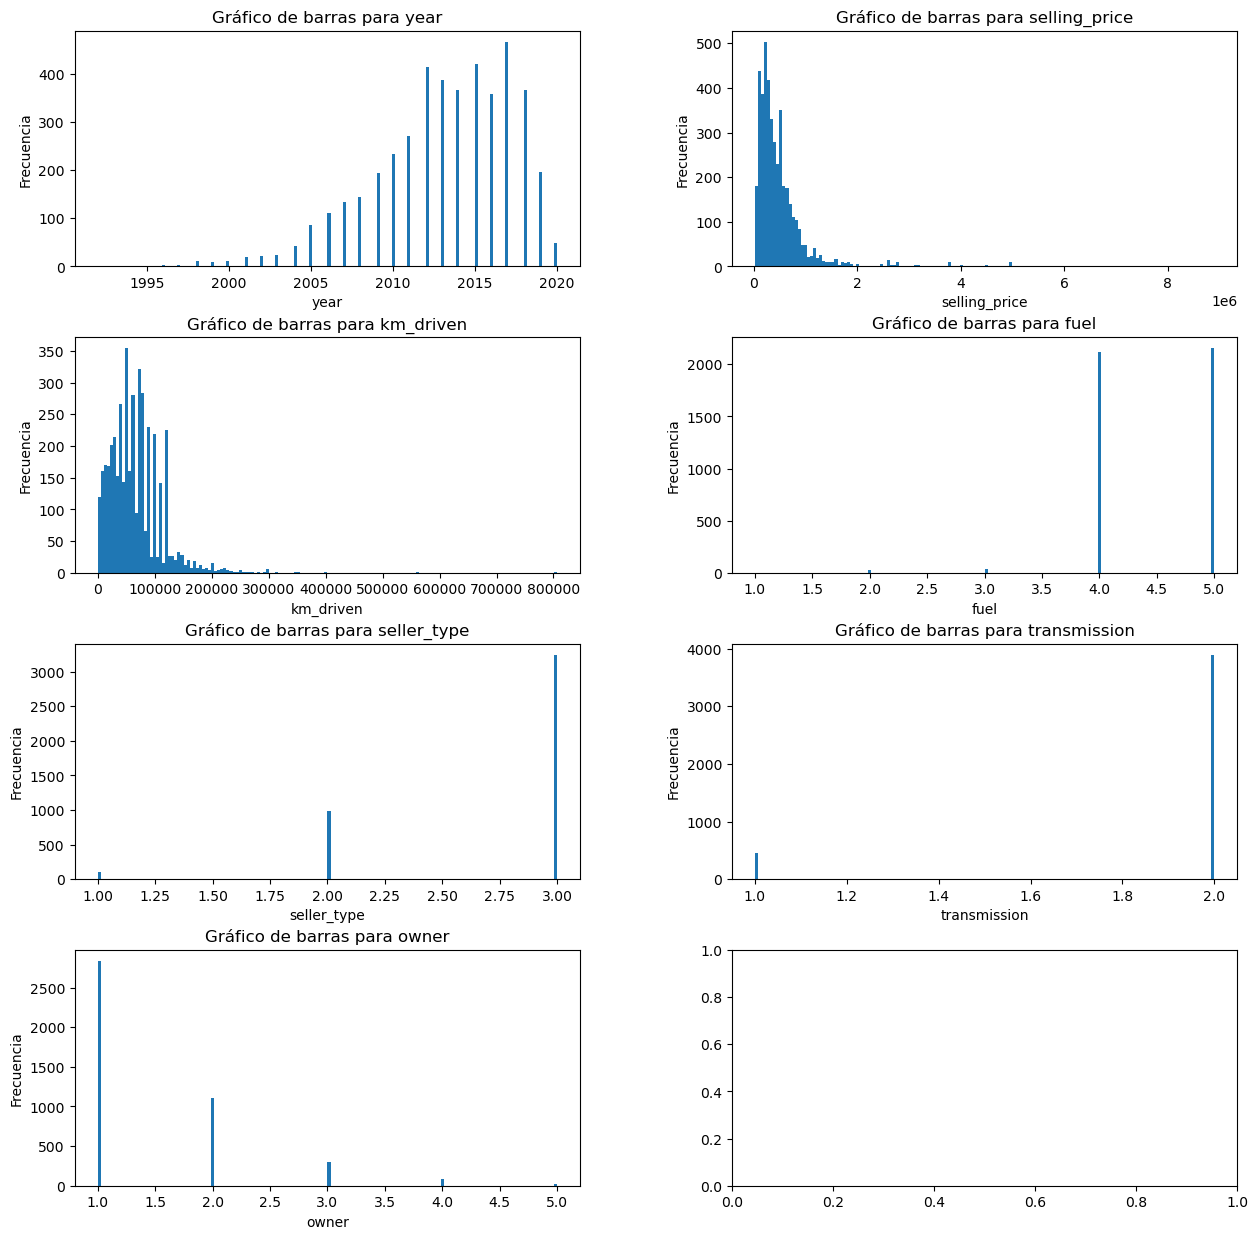

In [13]:
#Graficamos las variables numericas en graficos de histogramas
n_filas = 4
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15,15)) #Dentro de la misma figura creamos 4 graficas

plt.subplots_adjust(wspace=0.3, hspace=0.3)

columnas = ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']

for i, columna in enumerate(columnas):
    # Calcular la posición del subplot
    fila = i // n_columnas
    col = i % n_columnas
    
    # Verificar si el índice está dentro del rango del número de columnas
    if i < len(columnas):
        
        # Crear el gráfico de histograma en el subplot correspondiente
        axs[fila, col].hist(df_proc[columna], bins=150)
        
        # Añadir títulos y etiquetas
        axs[fila, col].set_title(f'Gráfico de barras para {columna}')
        axs[fila, col].set_xlabel(columna)
        axs[fila, col].set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

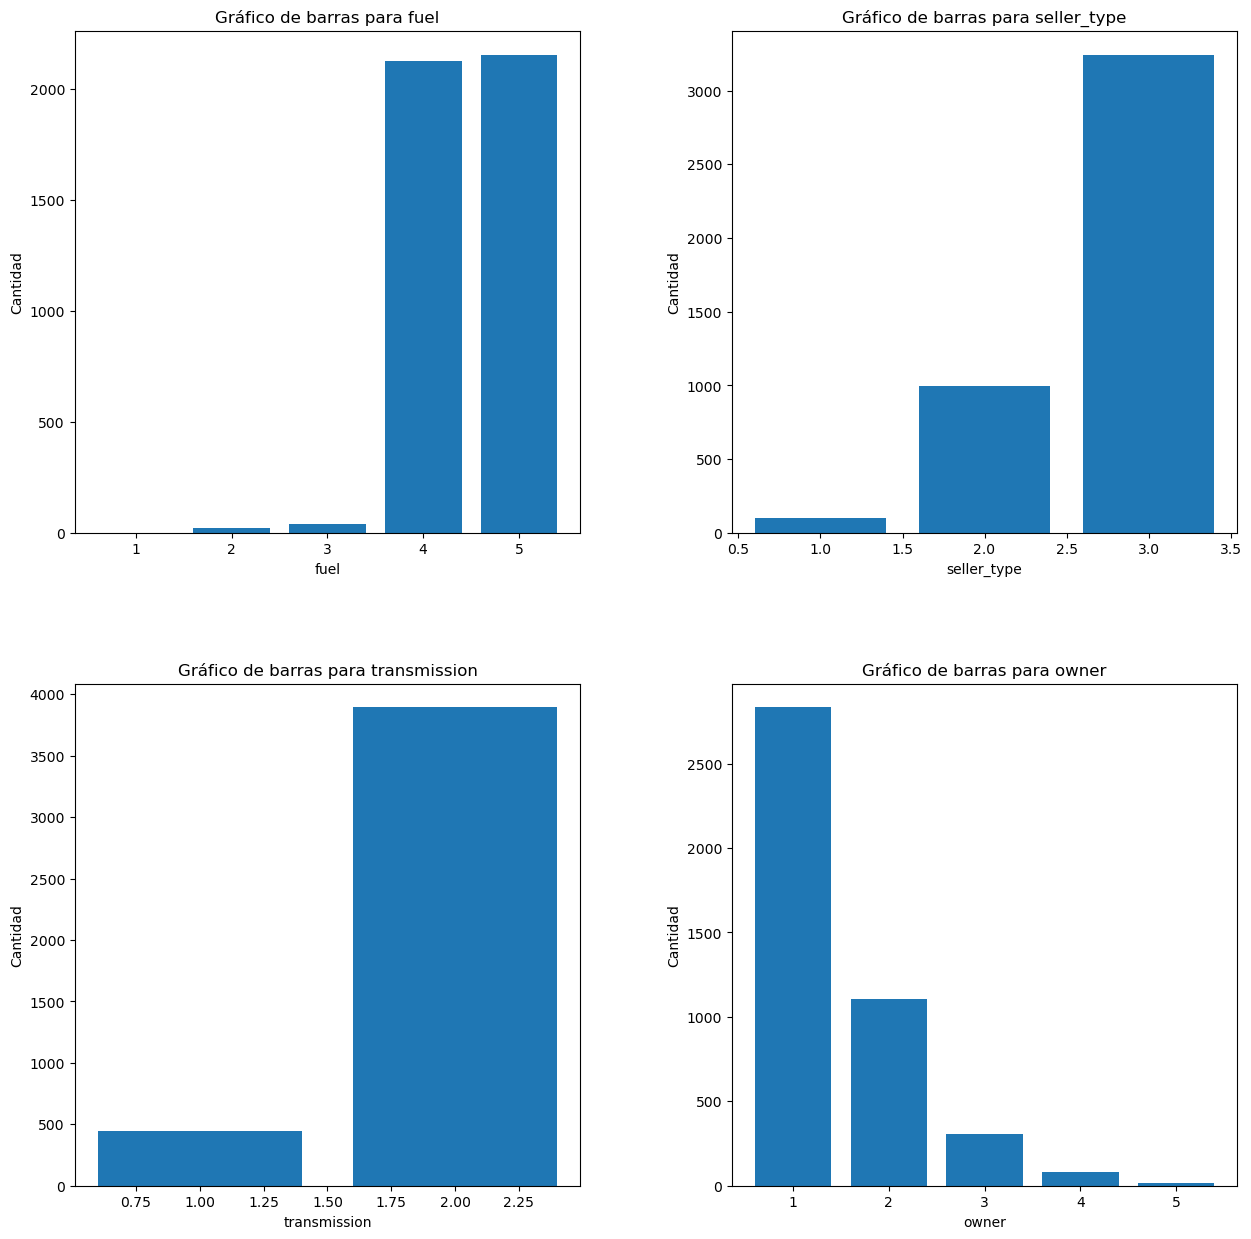

In [14]:
#Graficamos las variables categoricas en graficos de barras
n_filas = 2
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15,15)) #Dentro de la misma figura creamos 4 graficas

plt.subplots_adjust(wspace=0.3, hspace=0.3)

columnas = ['fuel', 'seller_type', 'transmission', 'owner']

for i, columna in enumerate(columnas):
    # Calcular la posición del subplot
    fila = i // n_columnas
    col = i % n_columnas
    
    # Verificar si el índice está dentro del rango del número de columnas
    if i < len(columnas):
        # Agrupar los datos por la columna y contar las ocurrencias
        datos = df[columna].value_counts()
        
        # Crear el gráfico de barras en el subplot correspondiente
        axs[fila, col].bar(datos.index, datos.values)
        
        # Añadir títulos y etiquetas
        axs[fila, col].set_title(f'Gráfico de barras para {columna}')
        axs[fila, col].set_xlabel(columna)
        axs[fila, col].set_ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

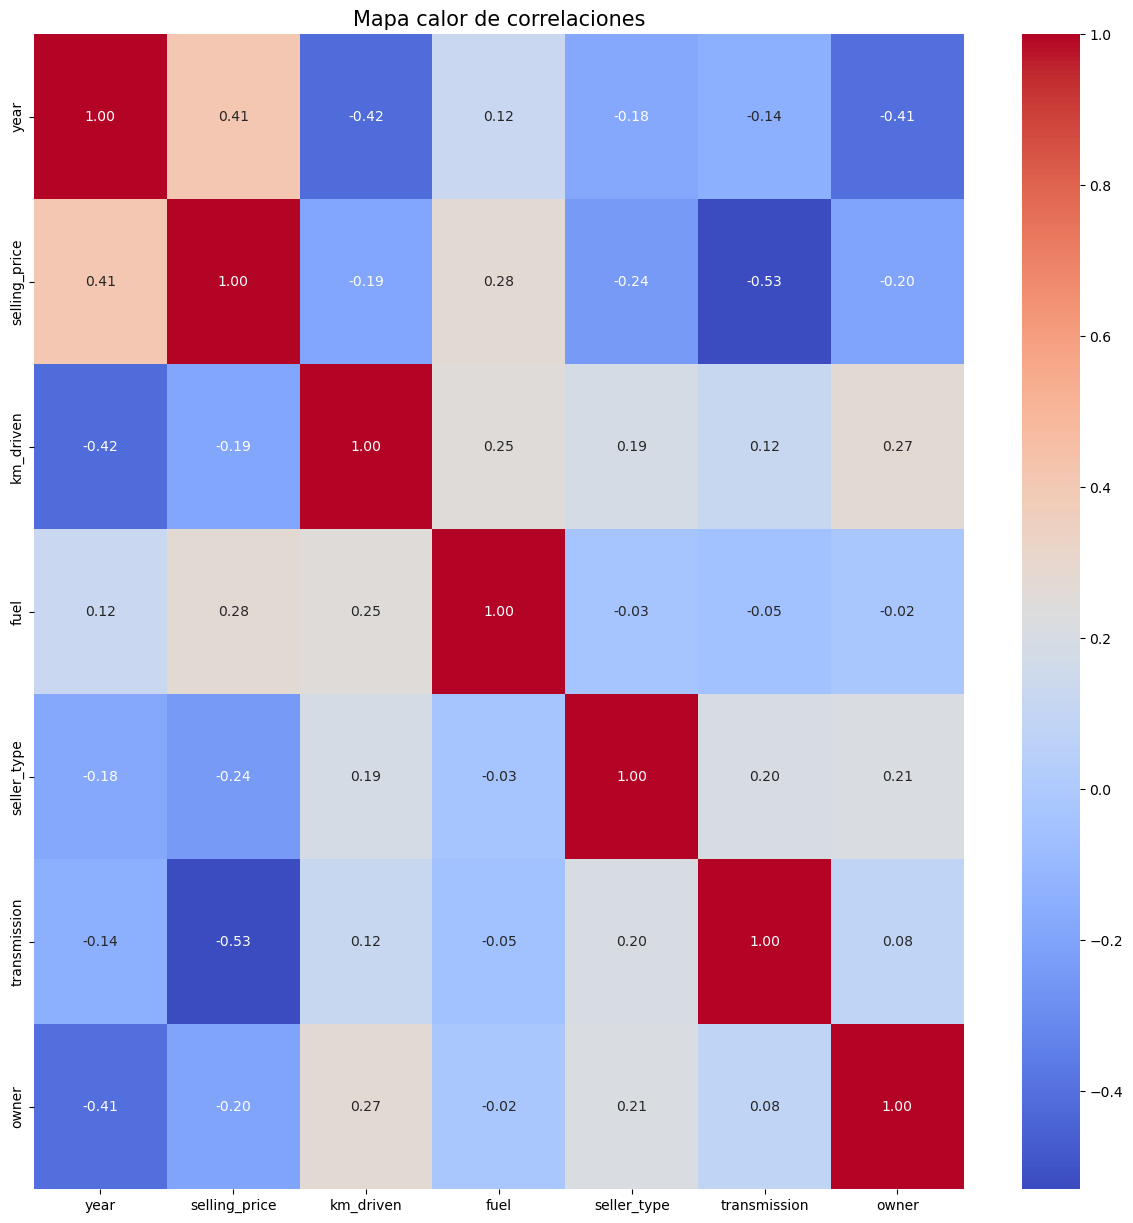

In [15]:
#Matriz de correlación
plt.figure(figsize = (15,15))
heatmap = sns.heatmap(df_proc.drop(columns='name').corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
#Corr es el metodo de correlación entre variables
#annot permite visualizar anotaciones; Cmap permite darle color al mapa; fmt es la cantidad de decimales
plt.title('Mapa calor de correlaciones', fontsize = 15)
plt.show()

# Modelos de predicción

In [16]:
from sklearn.model_selection import train_test_split
#Divide las bases en datos de entrenamiento (aprender) y datos de prueba (pronosticar)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#Modelos diferentes de machine learning 
from sklearn.metrics import mean_squared_error, r2_score
#Metricas de evaluación para saber cual de los 4 modelos funciona mejor

In [17]:
#Creamos una funcion para presentar los modelos y su evaluacion con las diferentes metricas
def crea_modelos():
    global df_proc, resultados
    y = df_proc['selling_price']
    x = df_proc.drop(columns=['selling_price','name'])
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
    
    #Diccionario de modelos
    models = {
        'Regresión Lineal': LinearRegression(),
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }
    
    #Diccionario de resultados para modelos de regresión
    results = {
        'Model': [], 
        'MSE': [],
        'RMSE': [],
        'R2': []
    }

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)

        # Métricas a evaluar
        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(test_y, predictions)

        results['Model'].append(name)
        results['MSE'].append(mse)
        #error cuadrático medio
        results['RMSE'].append(rmse)
        #la raíz del error cuadrático medio
        results['R2'].append(r2)
        #coeficiente de determinación R^2

    resultados = results

In [18]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
    print(model)
    print(resultados['MSE'][i])
    print(resultados['RMSE'][i])
    print(resultados['R2'][i])
    print('\n')
    #Para mostrar los resultados de cada modelo

C:\Users\braya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Lineal
135378708295.8114
367938.45721235964
0.47830539322527665


Regresión Logística
294682174129.0722
542846.3632825334
-0.1355855207295058


Árbol de Decisión
139984050530.02997
374144.42469456897
0.46055827304524155


Random Forest
114970899852.59908
339073.5906150744
0.5569488057303799


Naive Bayes
1198328413698.0261
1094681.8778522033
-3.6178714396147935




# Evaluación y Selección del Modelo

In [19]:
#Funcion que grafica los resultados de cada metrica
def visualiza_resultados():
    global df_proc, resultados
    #Transforma la lista de resultados en un DF
    results_df = pd.DataFrame(resultados)
    #Asignamos el indice al nombre del modelo
    results_df.set_index('Model', inplace=True)
    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    
    #Cada modelo lleva un color diferente
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD', '#B6001C' ]
    
    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), rot=0, color=colors)
    
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    
    plt.show()


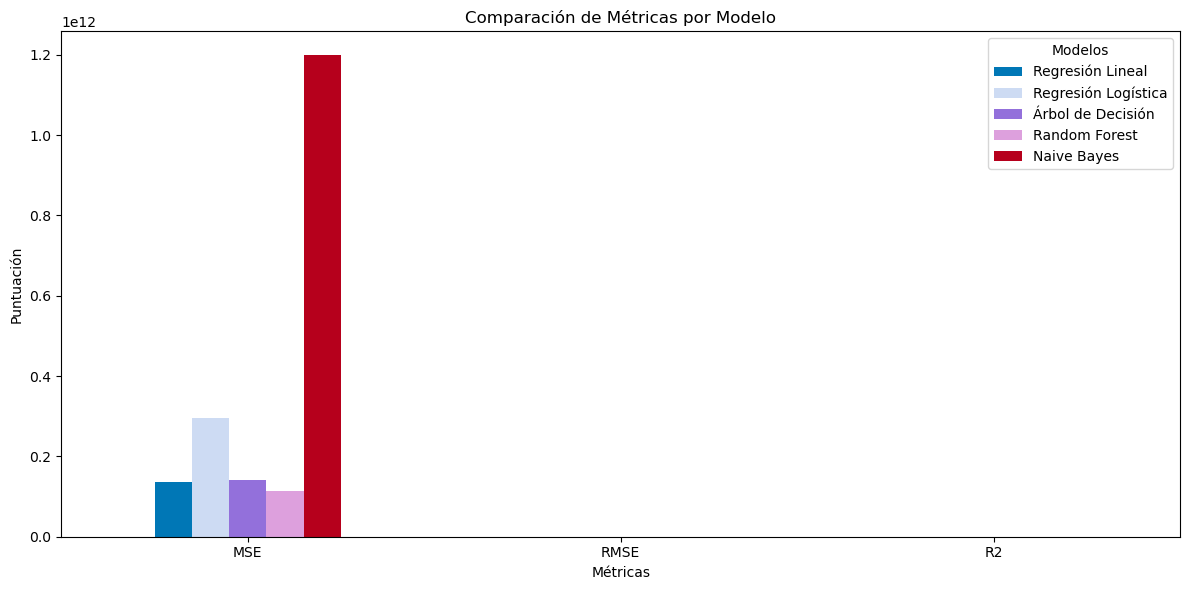

In [20]:
visualiza_resultados()
#Debido a que los valores de las metricas RMSE y R2 son muy pequeñas no se alcanza a observar en la grafica de barras

In [21]:
#Funcion que grafica los resultados de cada metrica
def visualiza_resultados2():
    global df_proc, resultados
    #Transforma la lista de resultados en un DF
    results_df = pd.DataFrame(resultados)
    #Asignamos el indice al nombre del modelo
    results_df.set_index('Model', inplace=True)
    #Eliminamos los resultados de MSE para poder ver las otras metricas
    results_df = results_df.drop(columns='MSE')
    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    
    
    #Cada modelo lleva un color diferente
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD', '#B6001C' ]
    
    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), rot=0, color=colors)
    
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    
    plt.show()

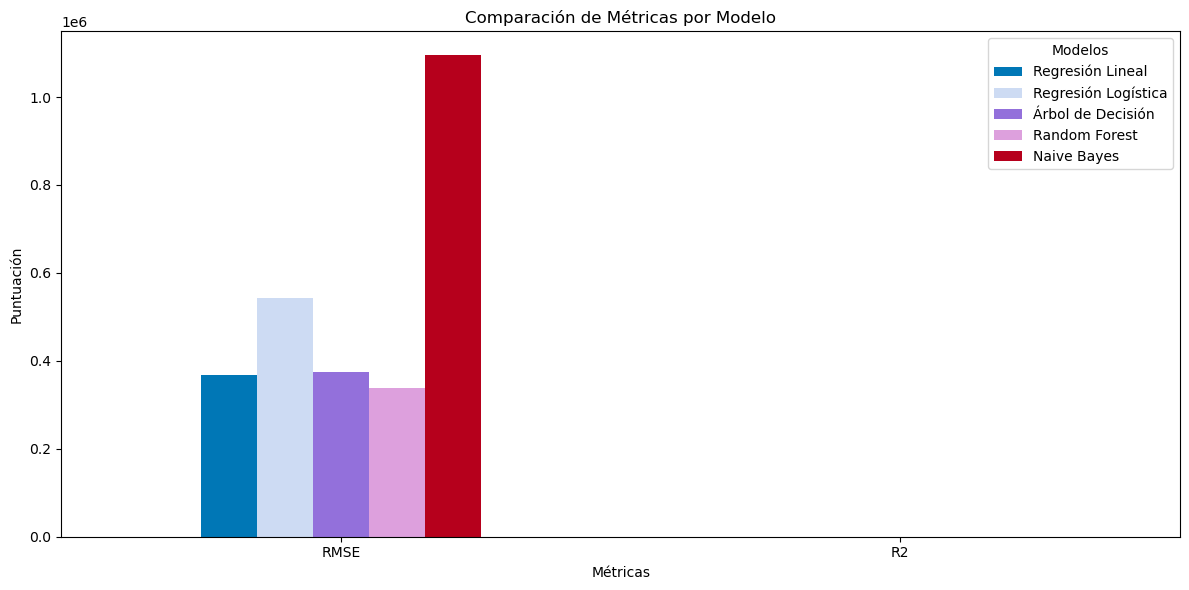

In [22]:
visualiza_resultados2()

In [23]:
#Funcion que grafica los resultados de cada metrica
def visualiza_resultados3():
    global df_proc, resultados
    #Transforma la lista de resultados en un DF
    results_df = pd.DataFrame(resultados)
    #Asignamos el indice al nombre del modelo
    results_df.set_index('Model', inplace=True)
    #Eliminamos los resultados de MSE para poder ver las otras metricas
    results_df = results_df.drop(columns=['MSE', 'RMSE'])
    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    
    
    #Cada modelo lleva un color diferente
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD', '#B6001C' ]
    
    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), rot=0, color=colors)
    
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    
    plt.show()

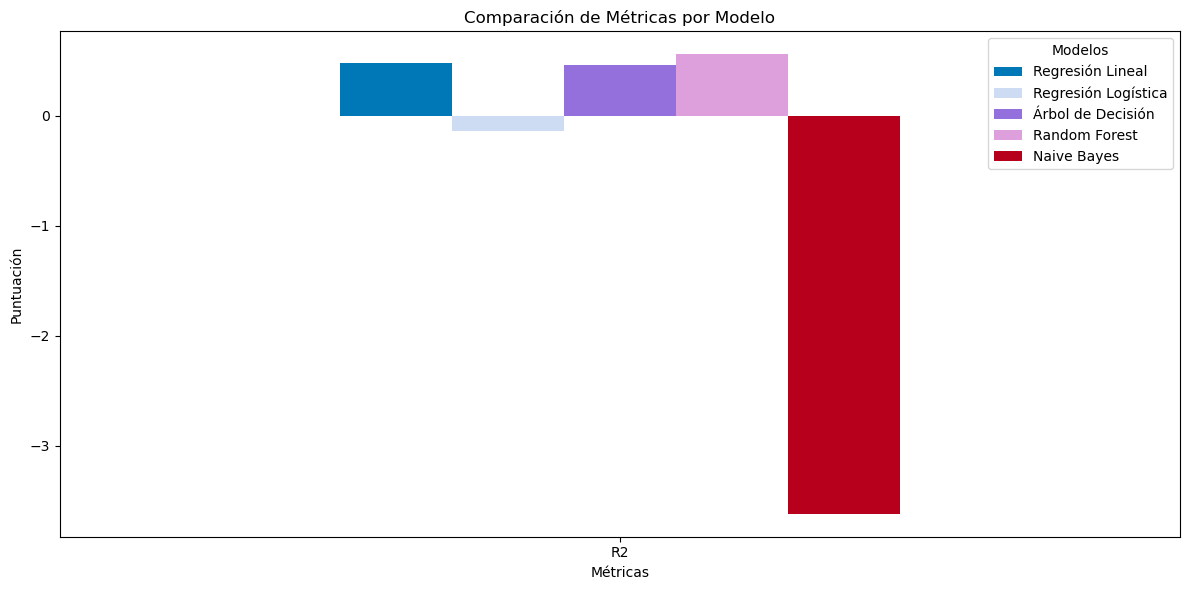

In [24]:
visualiza_resultados3()